In [3]:
'''
Test notebook to do the import by filesnames and not by creation date
'''

'\nTest notebook to do the import by filesnames and not by creation date\n'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from osgeo import gdal
import os
import xarray as xr
import pickle
from netCDF4 import Dataset

In [5]:
#create dictionary
dataDict = {}

#names of simulations
name_list = ['az','sg', 'lc', 'na']

#create parameter list
parameters = [
"topographic__elevation",
"soil__depth",
"sediment__flux",
"landform__ID",
"precipitation",
"landform__ID",
"erosion__rate",
"vegetation__density",
'slope_degrees',
'tree_fpc',
'grass_fpc',
'shrub_fpc'
]

for name in name_list:
    dataDict[name] = {}
    for p in parameters:
        dataDict[name][p] = []

path = '/home/mschmid/Desktop/Paper_2_analysis/results/paper_2_results/different_diff/coupled_vegi_precip/higher_K/'
path_to_output = '/ll_output/NC'

path_list = []
for name in name_list:
    path_list.append(os.path.join(path + name + path_to_output))

In [6]:
#netcdf input
elapsed_time_start = 4900000
elapsed_time_end   = 4922000
dt                 = 100
output_start       = 49000
output_end         = 49220
output_array       = np.arange(output_start, output_end, 1)
elapsed_time_array = np.arange(elapsed_time_start, elapsed_time_end, dt)

#csv_climate input
path_to_csv = '/debugging/'
filenames = 'climate.000'
all_csv_timesteps = np.arange(0,220,1)
all_csv_filenames = [str(filenames + str(t).zfill(3) + ".out") for t in all_csv_timesteps]

In [7]:
counter = 0

for name,simu in zip(name_list,path_list):
    _temp_temperature = []
    for elapsed, output, csv in zip(elapsed_time_array, output_array, all_csv_filenames):

        #netcdf handling
        nc_file_path = os.path.join(simu + f'/output{elapsed}__{output}.nc')
        _dataDump = Dataset(nc_file_path)
        counter += 1

        if counter % 100 == 0:
            print('100 files done')

        for p in parameters:
            _cutDump = _dataDump.variables[p][:][0]
            #delete boundary nodes
            _cutDump = np.delete(_cutDump, 0 , axis = 0) 
            _cutDump = np.delete(_cutDump,-1 , axis = 0)
            _cutDump = np.delete(_cutDump, 0 , axis = 1)
            _cutDump = np.delete(_cutDump,-1 , axis = 1)

            dataDict[name][p].append(_cutDump)

        #csv handling
        _temp_path = os.path.join(path + name + f'/debugging/{csv}')
        _temp_df = pd.read_csv(_temp_path, delim_whitespace = True)
        _temp_temperature.append(_temp_df['temp'].mean())
        
    dataDict[name]['temp'] = _temp_temperature
        
        
print('All done.')

100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
All done.


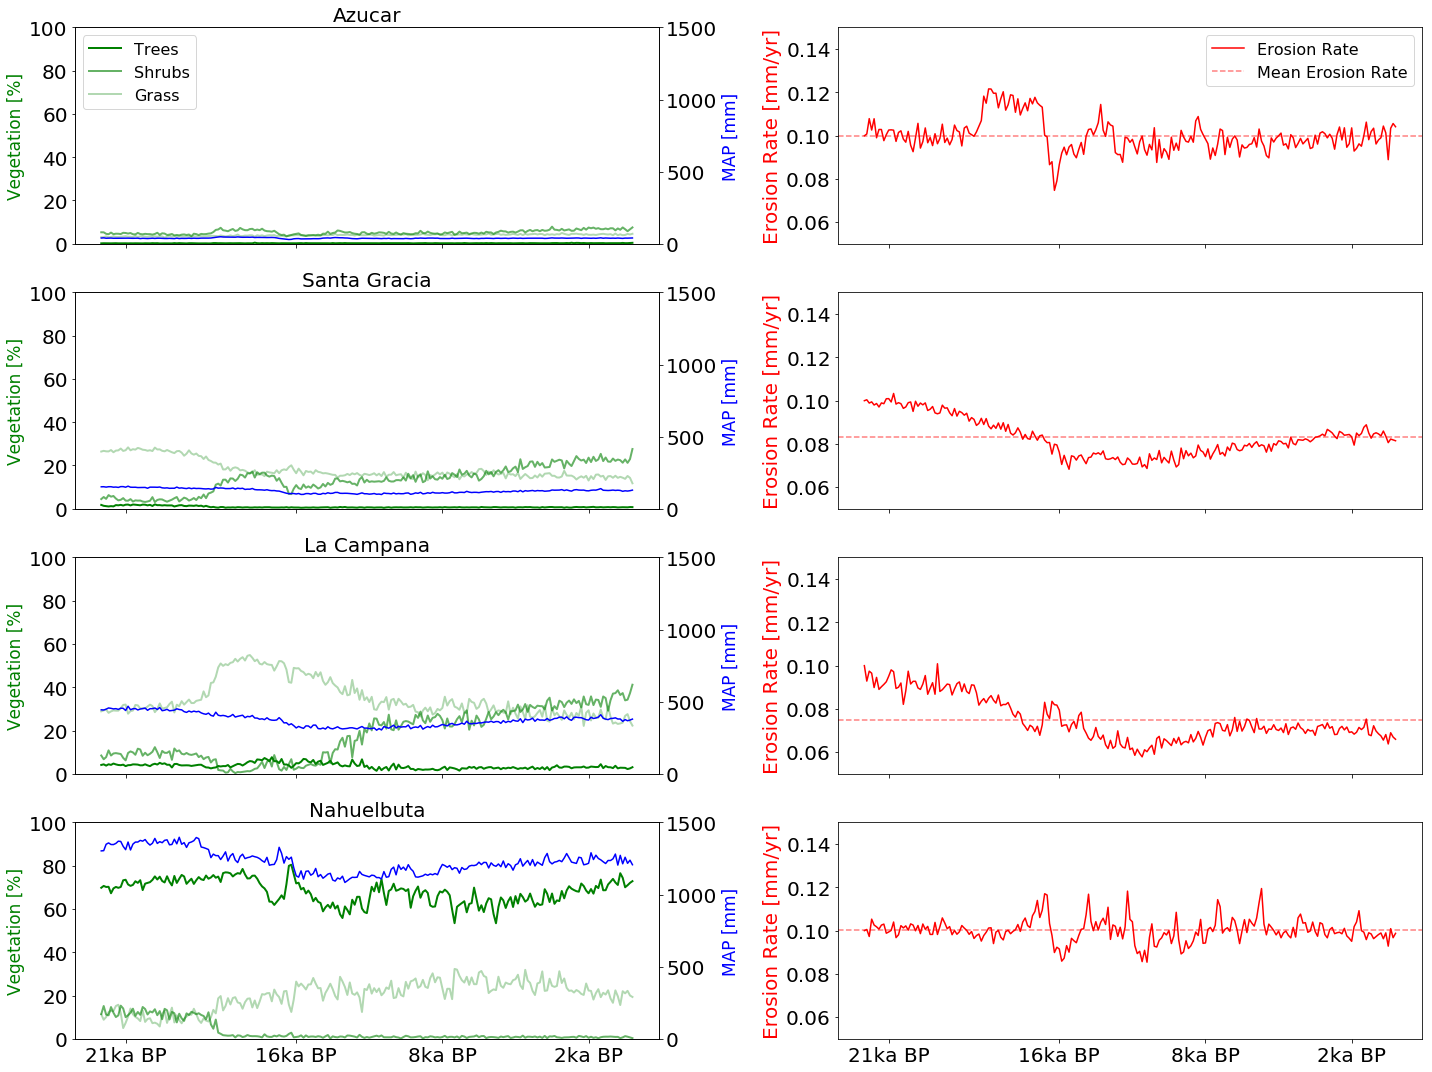

In [8]:
length_of_dataseries = np.shape(dataDict['az']['erosion__rate'])[0]

minV = 0
maxV = -1
azucar_trees  = [np.mean(v)*100 for v in dataDict['az']['tree_fpc']]
azucar_shrubs = [np.mean(v)*100 for v in dataDict['az']['shrub_fpc']]
azucar_grass  = [np.mean(v)*100 for v in dataDict['az']['grass_fpc']]
azucar_soil   = [np.mean(v) for v in dataDict['az']['soil__depth']]
azucar_rain   = [np.mean(v)*10 for v in dataDict['az']['precipitation']]
azucar_erosion= [np.mean(v)*1000 for v in dataDict['az']['erosion__rate']]

azucar_trees  = azucar_trees[minV:maxV]
azucar_shrubs = azucar_shrubs[minV:maxV]
azucar_grass  = azucar_grass[minV:maxV]
azucar_soil   = azucar_soil[minV:maxV]
azucar_rain   = azucar_rain[minV:maxV]
azucar_erosion= azucar_erosion[minV:maxV]

santa_gracia_trees  = [np.mean(v)*100 for v in dataDict['sg']['tree_fpc']]
santa_gracia_shrubs = [np.mean(v)*100 for v in dataDict['sg']['shrub_fpc']]
santa_gracia_grass  = [np.mean(v)*100 for v in dataDict['sg']['grass_fpc']]
santa_gracia_soil   = [np.mean(v) for v in dataDict['sg']['soil__depth']]
santa_gracia_rain   = [np.mean(v)*10 for v in dataDict['sg']['precipitation']]
santa_gracia_erosion= [np.mean(v)*1000 for v in dataDict['sg']['erosion__rate']]

santa_gracia_trees  = santa_gracia_trees[minV:maxV]
santa_gracia_shrubs = santa_gracia_shrubs[minV:maxV]
santa_gracia_grass  = santa_gracia_grass[minV:maxV]
santa_gracia_soil   = santa_gracia_soil[minV:maxV]
santa_gracia_rain   = santa_gracia_rain[minV:maxV]
santa_gracia_erosion= santa_gracia_erosion[minV:maxV]

la_campana_trees  = [np.mean(v)*100 for v in dataDict['lc']['tree_fpc']]
la_campana_shrubs = [np.mean(v)*100 for v in dataDict['lc']['shrub_fpc']]
la_campana_grass  = [np.mean(v)*100 for v in dataDict['lc']['grass_fpc']]
la_campana_soil   = [np.mean(v) for v in dataDict['lc']['soil__depth']]
la_campana_rain   = [np.mean(v)*10 for v in dataDict['lc']['precipitation']]
la_campana_erosion= [np.mean(v)*1000 for v in dataDict['lc']['erosion__rate']]

la_campana_trees  = la_campana_trees[minV:maxV]
la_campana_shrubs = la_campana_shrubs[minV:maxV]
la_campana_grass  = la_campana_grass[minV:maxV]
la_campana_soil   = la_campana_soil[minV:maxV]
la_campana_rain   = la_campana_rain[minV:maxV]
la_campana_erosion= la_campana_erosion[minV:maxV]

nahuelbuta_trees  = [np.mean(v)*100 for v in dataDict['na']['tree_fpc']]
nahuelbuta_shrubs = [np.mean(v)*100 for v in dataDict['na']['shrub_fpc']]
nahuelbuta_grass  = [np.mean(v)*100 for v in dataDict['na']['grass_fpc']]
nahuelbuta_soil   = [np.mean(v) for v in dataDict['na']['soil__depth']]
nahuelbuta_rain   = [np.mean(v)*10 for v in dataDict['na']['precipitation']]
nahuelbuta_erosion= [np.mean(v)*1000 for v in dataDict['na']['erosion__rate']]

nahuelbuta_trees  = nahuelbuta_trees[minV:maxV]
nahuelbuta_shrubs = nahuelbuta_shrubs[minV:maxV]
nahuelbuta_grass  = nahuelbuta_grass[minV:maxV]
nahuelbuta_soil   = nahuelbuta_soil[minV:maxV]
nahuelbuta_rain   = nahuelbuta_rain[minV:maxV]
nahuelbuta_erosion= nahuelbuta_erosion[minV:maxV]


#calculate means


time_vector = np.arange(0, np.shape(azucar_erosion)[0] * 100, 100)



###------------------------------PLOTTING-------------------------------------------#
fig, ax = plt.subplots(4,2, figsize = [20,15], sharex = True)
#--------LEFT SIDE-----------#

#---AZUCAR
ax[0,0].plot(time_vector, azucar_trees,'g' , linewidth = 2 , label = 'Trees', alpha = 1)
ax[0,0].plot(time_vector, azucar_shrubs,'g', linewidth = 2, label = 'Shrubs', alpha = 0.6)
ax[0,0].plot(time_vector, azucar_grass,'g', linewidth = 2, label = 'Grass'  , alpha = 0.3)
ax0 = ax[0,0].twinx()
ax0.plot(time_vector, azucar_rain, 'b')
ax0.set_ylim(0,1500)
ax[0,0].set_ylim(0,100)

#---SANTA GRACIA
ax[1,0].plot(time_vector, santa_gracia_trees, 'g', linewidth = 2, alpha = 1)
ax[1,0].plot(time_vector, santa_gracia_shrubs, 'g', linewidth = 2, alpha = 0.6)
ax[1,0].plot(time_vector, santa_gracia_grass, 'g', linewidth = 2, alpha = 0.3)
ax1 = ax[1,0].twinx()
ax1.plot(time_vector, santa_gracia_rain, 'b')
ax1.set_ylim(0,1500)
ax[1,0].set_ylim(0,100)

#---LA CAMPANA
ax[2,0].plot(time_vector, la_campana_trees, 'g', linewidth = 2, alpha = 1)
ax[2,0].plot(time_vector, la_campana_shrubs, 'g', linewidth = 2, alpha = 0.6)
ax[2,0].plot(time_vector, la_campana_grass, 'g', linewidth = 2, alpha = 0.3)
ax2 = ax[2,0].twinx()
ax2.plot(time_vector, la_campana_rain, 'b')
ax2.set_ylim(0,1500)
ax[2,0].set_ylim(0,100)

#---NAHUELBUTA
ax[3,0].plot(time_vector, nahuelbuta_trees, 'g', linewidth = 2, alpha = 1)
ax[3,0].plot(time_vector, nahuelbuta_shrubs, 'g', linewidth = 2, alpha = 0.6)
ax[3,0].plot(time_vector, nahuelbuta_grass, 'g', linewidth = 2, alpha = 0.3)
ax3 = ax[3,0].twinx()
ax3.plot(time_vector, nahuelbuta_rain, 'b')
ax3.set_ylim(0,1500)


ax[3,0].set_ylim(0,100)

#legend
ax[0,0].legend(fontsize = 16, loc = 'upper left')

#labels
ax[0,0].set_title('Azucar', fontsize = 20)
ax[1,0].set_title('Santa Gracia', fontsize = 20)
ax[2,0].set_title('La Campana', fontsize = 20)
ax[3,0].set_title('Nahuelbuta', fontsize = 20)

ax[0,0].set_ylabel('Vegetation [%]', fontsize = 17, color = 'green')
ax[1,0].set_ylabel('Vegetation [%]', fontsize = 17, color = 'green')
ax[2,0].set_ylabel('Vegetation [%]', fontsize = 17, color = 'green')
ax[3,0].set_ylabel('Vegetation [%]', fontsize = 17, color = 'green')

ax0.set_ylabel('MAP [mm]', fontsize = 17, color = 'blue')
ax1.set_ylabel('MAP [mm]', fontsize = 17, color = 'blue')
ax2.set_ylabel('MAP [mm]', fontsize = 17, color = 'blue')
ax3.set_ylabel('MAP [mm]', fontsize = 17, color = 'blue')
                   
                   
ax[0,1].set_ylabel('Erosion Rate [mm/yr]', fontsize = 20, color = 'red')
ax[1,1].set_ylabel('Erosion Rate [mm/yr]', fontsize = 20, color = 'red')
ax[2,1].set_ylabel('Erosion Rate [mm/yr]', fontsize = 20, color = 'red')
ax[3,1].set_ylabel('Erosion Rate [mm/yr]', fontsize = 20, color = 'red')



#formatting
ax[0,0].axes.tick_params(labelsize = 20)
ax[1,0].axes.tick_params(labelsize = 20)
ax[2,0].axes.tick_params(labelsize = 20)
ax[3,0].axes.tick_params(labelsize = 20)
ax[0,1].axes.tick_params(labelsize = 20)
ax[1,1].axes.tick_params(labelsize = 20)
ax[2,1].axes.tick_params(labelsize = 20)
ax[3,1].axes.tick_params(labelsize = 20)
ax0.axes.tick_params(labelsize = 20)
ax1.axes.tick_params(labelsize = 20)
ax2.axes.tick_params(labelsize = 20)
ax3.axes.tick_params(labelsize = 20)

x1 = [1000, 8000, 14000, 20000, 23000]
labels = ['21ka BP','16ka BP','8ka BP','2ka BP', 'PD']
ax[3,0].set_xticks(x1)
ax[3,0].set_xticklabels(labels)
ax[3,1].set_xticks(x1)
ax[3,1].set_xticklabels(labels)

#--------RIGHT SIDE----------#
#---AZUCAR
ax[0,1].plot(time_vector, azucar_erosion, 'r', linewidth = 1.5, label = 'Erosion Rate')
ax[0,1].set_ylim(0.05, 0.15)
ax[0,1].axhline(np.mean(azucar_erosion), color = 'red', alpha = 0.5, linestyle = '--', label = 'Mean Erosion Rate')
ax[0,1].legend(fontsize = 16)
#---SANTA GRACIA
ax[1,1].plot(time_vector, santa_gracia_erosion, 'r', linewidth = 1.5)
ax[1,1].set_ylim(0.05, 0.15)
ax[1,1].axhline(np.mean(santa_gracia_erosion), color = 'red', alpha = 0.5, linestyle = '--')
#---LA CAMPANA
ax[2,1].plot(time_vector, la_campana_erosion, 'r', linewidth = 1.5)
ax[2,1].set_ylim(0.05, 0.15)
ax[2,1].axhline(np.mean(la_campana_erosion), color = 'red', alpha = 0.5, linestyle = '--')
#---NAHUELBUTA
ax[3,1].plot(time_vector, nahuelbuta_erosion, 'r', linewidth = 1.5)
ax[3,1].set_ylim(0.05, 0.15)
ax[3,1].axhline(np.mean(nahuelbuta_erosion), color = 'red', alpha = 0.5, linestyle = '--')



plt.tight_layout()

plt.savefig('erosion_rates_per_area.png')

### Correlation Coefficients
#### Timeseries

#### Total Correlation Coefficients

In [9]:
azucar_erosion_trees_correff_total  = np.corrcoef(azucar_erosion, azucar_trees)[0][1]
azucar_erosion_shrubs_correff_total = np.corrcoef(azucar_erosion, azucar_shrubs)[0][1]
azucar_erosion_grass_correff_total  = np.corrcoef(azucar_erosion, azucar_grass)[0][1]
azucar_erosion_rain_correff_total   = np.corrcoef(azucar_erosion, azucar_rain)[0][1]

santa_gracia_erosion_trees_correff_total  = np.corrcoef(santa_gracia_erosion, santa_gracia_trees)[0][1]
santa_gracia_erosion_shrubs_correff_total = np.corrcoef(santa_gracia_erosion, santa_gracia_shrubs)[0][1]
santa_gracia_erosion_grass_correff_total  = np.corrcoef(santa_gracia_erosion, santa_gracia_grass)[0][1]
santa_gracia_erosion_rain_correff_total   = np.corrcoef(santa_gracia_erosion, santa_gracia_rain)[0][1]

la_campana_erosion_trees_correff_total  = np.corrcoef(la_campana_erosion, la_campana_trees)[0][1]
la_campana_erosion_shrubs_correff_total = np.corrcoef(la_campana_erosion, la_campana_shrubs)[0][1]
la_campana_erosion_grass_correff_total  = np.corrcoef(la_campana_erosion, la_campana_grass)[0][1]
la_campana_erosion_rain_correff_total   = np.corrcoef(la_campana_erosion, la_campana_rain)[0][1]

nahuelbuta_erosion_trees_correff_total  = np.corrcoef(nahuelbuta_erosion, nahuelbuta_trees)[0][1]
nahuelbuta_erosion_shrubs_correff_total = np.corrcoef(nahuelbuta_erosion, nahuelbuta_shrubs)[0][1]
nahuelbuta_erosion_grass_correff_total  = np.corrcoef(nahuelbuta_erosion, nahuelbuta_grass)[0][1]
nahuelbuta_erosion_rain_correff_total   = np.corrcoef(nahuelbuta_erosion, nahuelbuta_rain)[0][1]


In [10]:
df_az = pd.DataFrame({'Erosion Rate' : azucar_erosion})
df_az['MAP']    = azucar_rain
df_az['Temp']   = dataDict['az']['temp'][1:]
df_az['Grass']  = azucar_grass
df_az['Shrubs'] = azucar_shrubs
df_az['Trees']  = azucar_trees
corr_az = df_az.corr()

df_sg = pd.DataFrame({'Erosion Rate' : santa_gracia_erosion})
df_sg['MAP'] = santa_gracia_rain
df_sg['Temp']   = dataDict['sg']['temp'][1:]
df_sg['Grass'] = santa_gracia_grass
df_sg['Shrubs'] = santa_gracia_shrubs
df_sg['Trees'] = santa_gracia_trees
corr_sg = df_sg.corr()

df_lc = pd.DataFrame({'Erosion Rate' : la_campana_erosion})
df_lc['MAP'] = la_campana_rain
df_lc['Temp']   = dataDict['lc']['temp'][1:]
df_lc['Grass'] = la_campana_grass
df_lc['Shrubs'] = la_campana_shrubs
df_lc['Trees'] = la_campana_trees
corr_lc = df_lc.corr()

df_na = pd.DataFrame({'Erosion Rate' : nahuelbuta_erosion})
df_na['MAP'] = nahuelbuta_rain
df_na['Temp']   = dataDict['na']['temp'][1:]
df_na['Grass'] = nahuelbuta_grass
df_na['Shrubs'] = nahuelbuta_shrubs
df_na['Trees'] = nahuelbuta_trees
corr_na = df_na.corr()

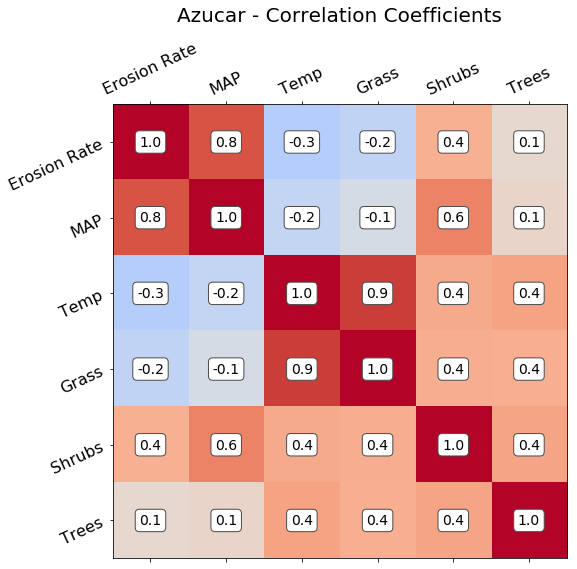

In [11]:
fig, ax = plt.subplots(1, figsize = [8,8])
co = ax.matshow(corr_az, cmap = 'coolwarm', vmin = -1 , vmax = 1)
ax.set_xticks(range(len(df_az.columns)))
ax.set_xticklabels(df_az.columns)
ax.set_yticks(range(len(df_az.columns)))
ax.set_yticklabels(df_az.columns)
ax.axes.tick_params(labelsize = 16, rotation = 25)
ax.set_title('Azucar - Correlation Coefficients', pad = 60, fontsize = 20)
#plt.colorbar(co)

for (i,j), z in np.ndenumerate(df_az.corr()):
    ax.text(j,i,'{:0.1f}'.format(z), ha = 'center', va = 'center', 
           bbox = dict(boxstyle='round', facecolor = 'white', edgecolor = '0.3'), fontsize = 14)
    
plt.tight_layout()
plt.savefig('azucar_correlation_matrix.png')

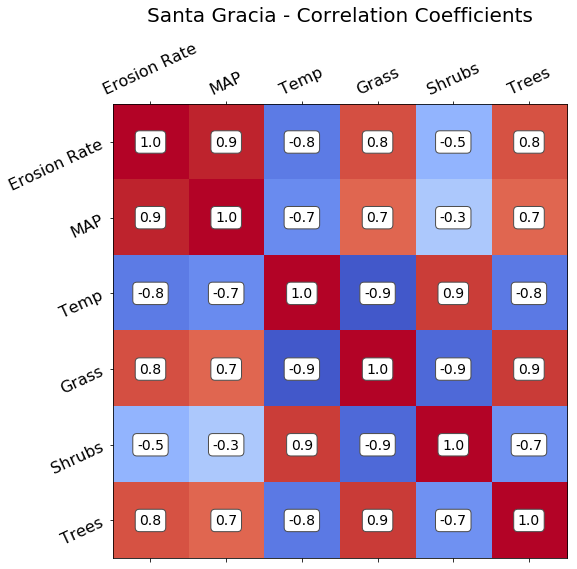

In [12]:
fig, ax = plt.subplots(1, figsize = [8,8])
co = ax.matshow(corr_sg, cmap = 'coolwarm', vmin = -1 , vmax = 1)
ax.set_xticks(range(len(df_sg.columns)))
ax.set_xticklabels(df_sg.columns)
ax.set_yticks(range(len(df_sg.columns)))
ax.set_yticklabels(df_sg.columns)
ax.axes.tick_params(labelsize = 16, rotation = 25)
ax.set_title('Santa Gracia - Correlation Coefficients', pad = 60, fontsize = 20)
#plt.colorbar(co)

for (i,j), z in np.ndenumerate(df_sg.corr()):
    ax.text(j,i,'{:0.1f}'.format(z), ha = 'center', va = 'center', 
           bbox = dict(boxstyle='round', facecolor = 'white', edgecolor = '0.3'), fontsize = 14)
    
plt.tight_layout()
plt.savefig('santa_gracia_correlation_matrix.png')

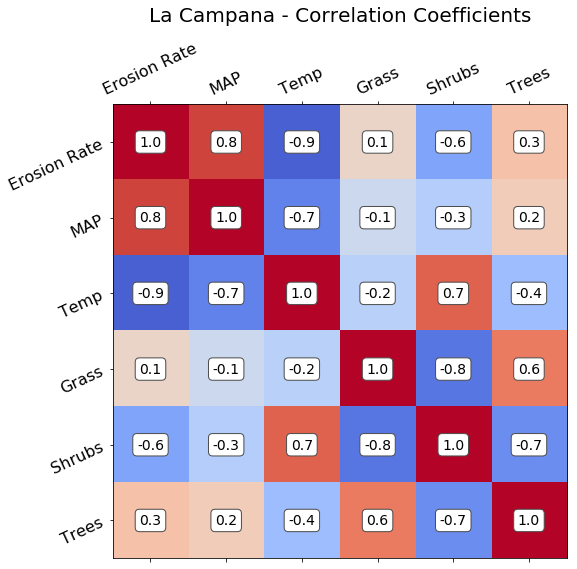

In [13]:
fig, ax = plt.subplots(1, figsize = [8,8])
co = ax.matshow(corr_lc, cmap = 'coolwarm', vmin = -1 , vmax = 1)
ax.set_xticks(range(len(df_lc.columns)))
ax.set_xticklabels(df_lc.columns)
ax.set_yticks(range(len(df_lc.columns)))
ax.set_yticklabels(df_lc.columns)
ax.axes.tick_params(labelsize = 16, rotation = 25)
ax.set_title('La Campana - Correlation Coefficients', pad = 60, fontsize = 20)
#plt.colorbar(co)

for (i,j), z in np.ndenumerate(df_lc.corr()):
    ax.text(j,i,'{:0.1f}'.format(z), ha = 'center', va = 'center', 
           bbox = dict(boxstyle='round', facecolor = 'white', edgecolor = '0.3'), fontsize = 14)
    
plt.tight_layout()
plt.savefig('la_campana_correlation_matrix.png')

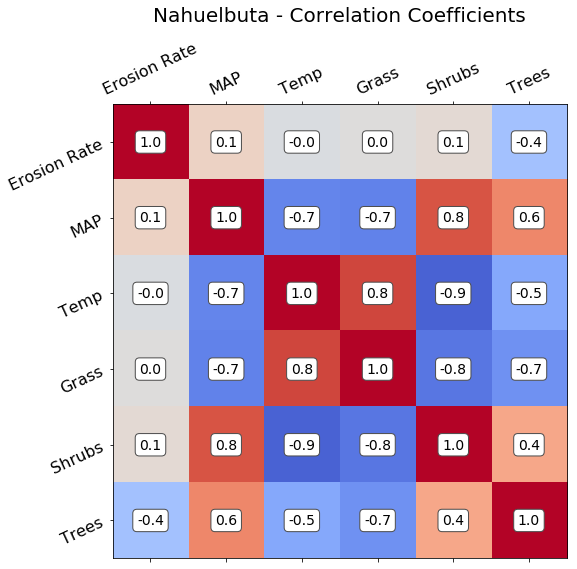

In [14]:
fig, ax = plt.subplots(1, figsize = [8,8])
co = ax.matshow(corr_na, cmap = 'coolwarm', vmin = -1 , vmax = 1)
ax.set_xticks(range(len(df_na.columns)))
ax.set_xticklabels(df_na.columns)
ax.set_yticks(range(len(df_na.columns)))
ax.set_yticklabels(df_na.columns)
ax.axes.tick_params(labelsize = 16, rotation = 25)
ax.set_title('Nahuelbuta - Correlation Coefficients', pad = 60, fontsize = 20)
#plt.colorbar(co)

for (i,j), z in np.ndenumerate(df_na.corr()):
    ax.text(j,i,'{:0.1f}'.format(z), ha = 'center', va = 'center', 
           bbox = dict(boxstyle='round', facecolor = 'white', edgecolor = '0.3'), fontsize = 14)
    
#plt.colorbar(co)
plt.tight_layout()
plt.savefig('nahuelbuta_correlation_matrix.png')

## Plots per Area

In [15]:
#array of cumulative fpc values for azucar
azucar_vegi_cum = [np.sum([t,s,g]) for t,s,g in zip(azucar_trees, azucar_shrubs, azucar_grass)]
santa_gracia_vegi_cum = [np.sum([t,s,g]) for t,s,g in zip(santa_gracia_trees, santa_gracia_shrubs, santa_gracia_grass)]
la_campana_vegi_cum = [np.sum([t,s,g]) for t,s,g in zip(la_campana_trees, la_campana_shrubs, la_campana_grass)]
nahuelbuta_vegi_cum = [np.sum([t,s,g]) for t,s,g in zip(nahuelbuta_trees, nahuelbuta_shrubs, nahuelbuta_grass)]


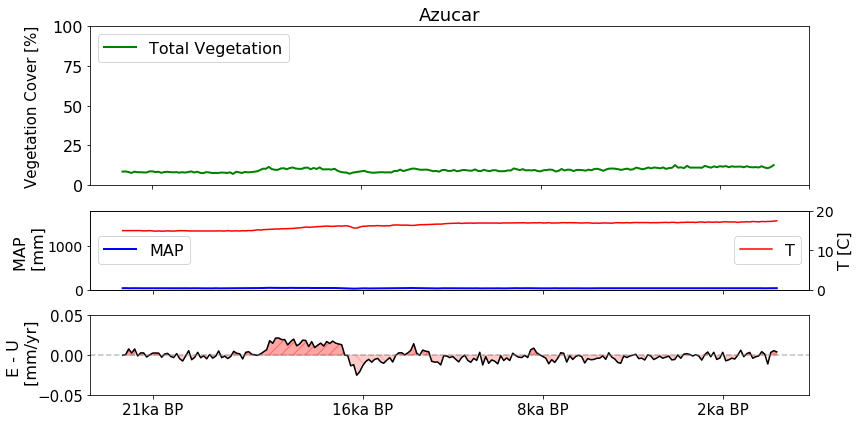

In [57]:
x1 = [1000, 8000, 14000, 20000, 23000]
labels = ['21ka BP','16ka BP','8ka BP','2ka BP', 'PD']

fig,ax = plt.subplots(nrows = 3,
                      ncols = 1,
                      figsize = [12,6], 
                      gridspec_kw = {'height_ratios' : [2,1,1] },
                      sharex = True)


#AZUCAR
ax[0].set_title('Azucar', fontsize = 18)
ax[0].plot(time_vector, azucar_vegi_cum, 'g', label = 'Total Vegetation', linewidth = 2)
ax[0].axes.tick_params(labelsize = 16)
ax[0].legend(loc = 'upper left', fontsize = 16)
ax[0].set_ylim(0,100)
ax[0].set_ylabel('Vegetation Cover [%]', fontsize = 15)
ax[0].get_yaxis().set_label_coords(-0.07,0.5)


ax[1].plot(time_vector, azucar_rain, 'b', label = 'MAP', linewidth = 2)
ax[1].legend(loc = 'center left', fontsize = 16)
ax[1].axes.tick_params(labelsize = 14)
ax[1].set_ylim(0, 1800)
ax[1].set_ylabel('MAP \n [mm]', fontsize = 16)
ax[1].get_yaxis().set_label_coords(-0.06,0.5)

ax1_y = ax[1].twinx()
ax1_y.plot(time_vector, dataDict['az']['temp'][1:],'r', label = 'T')
ax1_y.set_ylim(0,20)
ax1_y.axes.tick_params(labelsize = 14)
ax1_y.set_ylabel('T [C]', fontsize = 16)
ax1_y.legend(loc = 'center right', fontsize = 16)


ax[2].plot(time_vector, [e-.1 for e in azucar_erosion], 'k', linewidth = 1.5)
ax[2].axes.tick_params(labelsize = 15)
ax[2].set_ylim(-0.05,0.05)
ax[2].set_ylabel('E - U \n [mm/yr]', fontsize = 16)
ax[2].axhline(0, color = 'grey', linestyle = '--', alpha = 0.5)
ax[2].get_yaxis().set_label_coords(-0.07,0.5)

e_minus_u = [e-.1 for e in azucar_erosion]
ax[2].fill_between(time_vector, 0, e_minus_u,
                   where = e_minus_u > np.zeros(np.shape(e_minus_u)),
                   color = 'red',
                   hatch = '//',
                   alpha = 0.35)
ax[2].fill_between(time_vector, 0, e_minus_u,
                   where = e_minus_u < np.zeros(np.shape(e_minus_u)),
                   color = 'red',
                   hatch = '\\',
                   alpha = 0.2)

ax[0].set_xticks(x1)
ax[0].set_xticklabels(labels)

plt.tight_layout()

plt.savefig('azucar_total_veg_map_erosion.png')

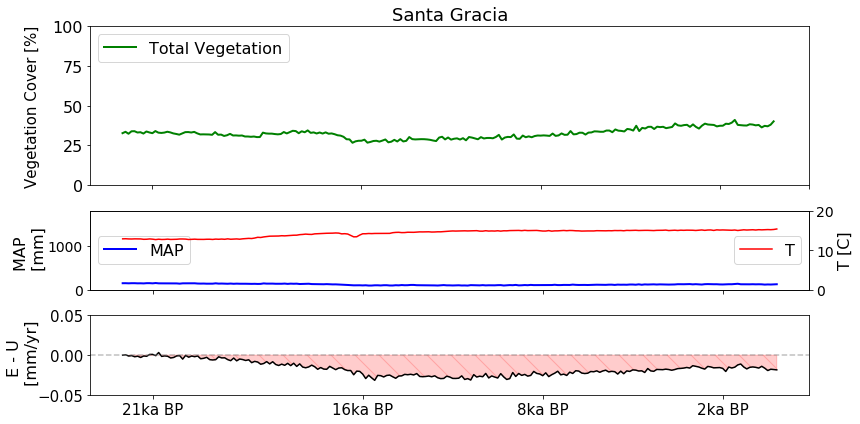

In [56]:
x1 = [1000, 8000, 14000, 20000, 23000]
labels = ['21ka BP','16ka BP','8ka BP','2ka BP', 'PD']

fig,ax = plt.subplots(nrows = 3,
                      ncols = 1,
                      figsize = [12,6], 
                      gridspec_kw = {'height_ratios' : [2,1,1] },
                      sharex = True)


#AZUCAR
ax[0].set_title('Santa Gracia', fontsize = 18)
ax[0].plot(time_vector, santa_gracia_vegi_cum, 'g', label = 'Total Vegetation', linewidth = 2)
ax[0].axes.tick_params(labelsize = 16)
ax[0].legend(loc = 'upper left', fontsize = 16)
ax[0].set_ylim(0,100)
ax[0].set_ylabel('Vegetation Cover [%]', fontsize = 15)
ax[0].get_yaxis().set_label_coords(-0.07,0.5)


ax[1].plot(time_vector, santa_gracia_rain, 'b', label = 'MAP', linewidth = 2)
ax[1].legend(loc = 'center left', fontsize = 16)
ax[1].axes.tick_params(labelsize = 14)
ax[1].set_ylim(0, 1800)
ax[1].set_ylabel('MAP \n [mm]', fontsize = 16)
ax[1].get_yaxis().set_label_coords(-0.06,0.5)

ax1_y = ax[1].twinx()
ax1_y.plot(time_vector, dataDict['sg']['temp'][1:],'r', label = 'T')
ax1_y.set_ylim(0,20)
ax1_y.axes.tick_params(labelsize = 14)
ax1_y.set_ylabel('T [C]', fontsize = 16)
ax1_y.legend(loc = 'center right', fontsize = 16)


ax[2].plot(time_vector, [e-.1 for e in santa_gracia_erosion], 'k', linewidth = 1.5)
ax[2].axes.tick_params(labelsize = 15)
ax[2].set_ylim(-0.05,0.05)
ax[2].set_ylabel('E - U \n [mm/yr]', fontsize = 16)
ax[2].axhline(0, color = 'grey', linestyle = '--', alpha = 0.5)
ax[2].get_yaxis().set_label_coords(-0.07,0.5)

e_minus_u = [e-.1 for e in santa_gracia_erosion]
ax[2].fill_between(time_vector, 0, e_minus_u,
                   where = e_minus_u > np.zeros(np.shape(e_minus_u)),
                   color = 'red',
                   hatch = '//',
                   alpha = 0.35)
ax[2].fill_between(time_vector, 0, e_minus_u,
                   where = e_minus_u < np.zeros(np.shape(e_minus_u)),
                   color = 'red',
                   hatch = '\\',
                   alpha = 0.2)

ax[0].set_xticks(x1)
ax[0].set_xticklabels(labels)

plt.tight_layout()

plt.savefig('santa_gracia_total_veg_map_erosion.png')

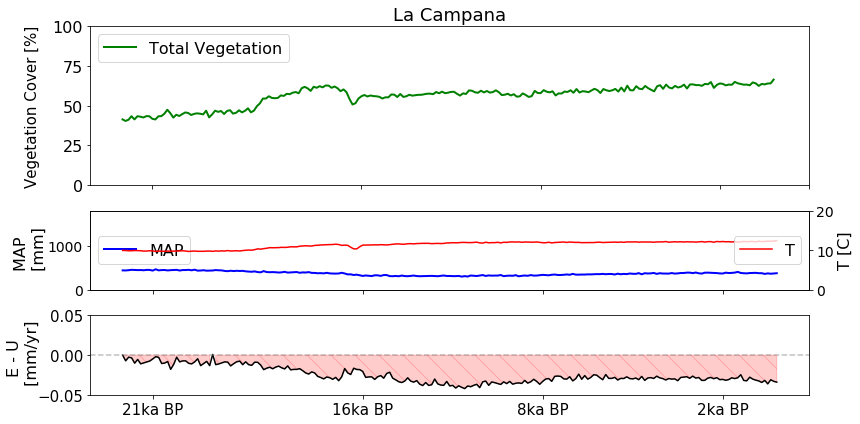

In [55]:
x1 = [1000, 8000, 14000, 20000, 23000]
labels = ['21ka BP','16ka BP','8ka BP','2ka BP', 'PD']

fig,ax = plt.subplots(nrows = 3,
                      ncols = 1,
                      figsize = [12,6], 
                      gridspec_kw = {'height_ratios' : [2,1,1] },
                      sharex = True)


#AZUCAR
ax[0].set_title('La Campana', fontsize = 18)
ax[0].plot(time_vector, la_campana_vegi_cum, 'g', label = 'Total Vegetation', linewidth = 2)
ax[0].axes.tick_params(labelsize = 16)
ax[0].legend(loc = 'upper left', fontsize = 16)
ax[0].set_ylim(0,100)
ax[0].set_ylabel('Vegetation Cover [%]', fontsize = 15)
ax[0].get_yaxis().set_label_coords(-0.07,0.5)


ax[1].plot(time_vector, la_campana_rain, 'b', label = 'MAP', linewidth = 2)
ax[1].legend(loc = 'center left', fontsize = 16)
ax[1].axes.tick_params(labelsize = 14)
ax[1].set_ylim(0, 1800)
ax[1].set_ylabel('MAP \n [mm]', fontsize = 16)
ax[1].get_yaxis().set_label_coords(-0.06,0.5)

ax1_y = ax[1].twinx()
ax1_y.plot(time_vector, dataDict['lc']['temp'][1:],'r', label = 'T')
ax1_y.set_ylim(0,20)
ax1_y.axes.tick_params(labelsize = 14)
ax1_y.set_ylabel('T [C]', fontsize = 16)
ax1_y.legend(loc = 'center right', fontsize = 16)


ax[2].plot(time_vector, [e-.1 for e in la_campana_erosion], 'k', linewidth = 1.5)
ax[2].axes.tick_params(labelsize = 15)
ax[2].set_ylim(-0.05,0.05)
ax[2].set_ylabel('E - U \n [mm/yr]', fontsize = 16)
ax[2].axhline(0, color = 'grey', linestyle = '--', alpha = 0.5)
ax[2].get_yaxis().set_label_coords(-0.07,0.5)

e_minus_u = [e-.1 for e in la_campana_erosion]
ax[2].fill_between(time_vector, 0, e_minus_u,
                   where = e_minus_u > np.zeros(np.shape(e_minus_u)),
                   color = 'red',
                   hatch = '//',
                   alpha = 0.35)
ax[2].fill_between(time_vector, 0, e_minus_u,
                   where = e_minus_u < np.zeros(np.shape(e_minus_u)),
                   color = 'red',
                   hatch = '\\',
                   alpha = 0.2)

ax[0].set_xticks(x1)
ax[0].set_xticklabels(labels)

plt.tight_layout()

plt.savefig('la_campana_total_veg_map_erosion.png')

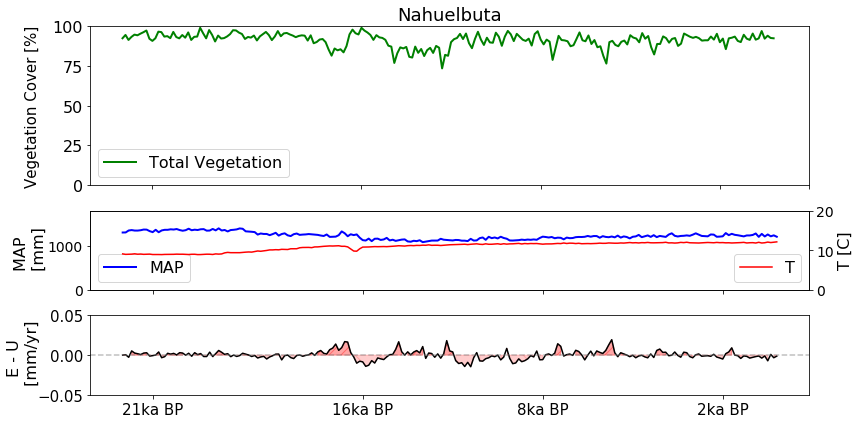

In [59]:
x1 = [1000, 8000, 14000, 20000, 23000]
labels = ['21ka BP','16ka BP','8ka BP','2ka BP', 'PD']

fig,ax = plt.subplots(nrows = 3,
                      ncols = 1,
                      figsize = [12,6], 
                      gridspec_kw = {'height_ratios' : [2,1,1] },
                      sharex = True)


#AZUCAR
ax[0].set_title('Nahuelbuta', fontsize = 18)
ax[0].plot(time_vector, nahuelbuta_vegi_cum, 'g', label = 'Total Vegetation', linewidth = 2)
ax[0].axes.tick_params(labelsize = 16)
ax[0].legend(loc = 'lower left', fontsize = 16)
ax[0].set_ylim(0,100)
ax[0].set_ylabel('Vegetation Cover [%]', fontsize = 15)
ax[0].get_yaxis().set_label_coords(-0.07,0.5)


ax[1].plot(time_vector, nahuelbuta_rain, 'b', label = 'MAP', linewidth = 2)
ax[1].legend(loc = 'lower left', fontsize = 16)
ax[1].axes.tick_params(labelsize = 14)
ax[1].set_ylim(0, 1800)
ax[1].set_ylabel('MAP \n [mm]', fontsize = 16)
ax[1].get_yaxis().set_label_coords(-0.06,0.5)

ax1_y = ax[1].twinx()
ax1_y.plot(time_vector, dataDict['na']['temp'][1:],'r', label = 'T')
ax1_y.set_ylim(0,20)
ax1_y.axes.tick_params(labelsize = 14)
ax1_y.set_ylabel('T [C]', fontsize = 16)
ax1_y.legend(loc = 'lower right', fontsize = 16)


ax[2].plot(time_vector, [e-.1 for e in nahuelbuta_erosion], 'k', linewidth = 1.5)
ax[2].axes.tick_params(labelsize = 15)
ax[2].set_ylim(-0.05,0.05)
ax[2].set_ylabel('E - U \n [mm/yr]', fontsize = 16)
ax[2].axhline(0, color = 'grey', linestyle = '--', alpha = 0.5)
ax[2].get_yaxis().set_label_coords(-0.07,0.5)

e_minus_u = [e-.1 for e in nahuelbuta_erosion]
ax[2].fill_between(time_vector, 0, e_minus_u,
                   where = e_minus_u > np.zeros(np.shape(e_minus_u)),
                   color = 'red',
                   hatch = '//',
                   alpha = 0.35)
ax[2].fill_between(time_vector, 0, e_minus_u,
                   where = e_minus_u < np.zeros(np.shape(e_minus_u)),
                   color = 'red',
                   hatch = '\\',
                   alpha = 0.2)

ax[0].set_xticks(x1)
ax[0].set_xticklabels(labels)

plt.tight_layout()

plt.savefig('nahuelbuta_total_veg_map_erosion.png')